In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdsc-outr-ml-event/FINAL_DATASET_KAGGLE/sample_submission.csv
/kaggle/input/gdsc-outr-ml-event/FINAL_DATASET_KAGGLE/train.csv
/kaggle/input/gdsc-outr-ml-event/FINAL_DATASET_KAGGLE/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [3]:
train_df = pd.read_csv('../input/gdsc-outr-ml-event/FINAL_DATASET_KAGGLE/train.csv')
test = pd.read_csv('../input/gdsc-outr-ml-event/FINAL_DATASET_KAGGLE/test.csv')

## Initial exploration of data

In [4]:
train_df.head(5)

,ID,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,ZIP,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1,NaN,NaN,NaN,white,nonhispanic,F,Beverly Massachusetts US,Holden,Massachusetts,Middlesex County,2476.0,1.517539e+05,9316.929057
1,2,Mrs.,NaN,M,white,hispanic,F,Townsend Massachusetts US,Chelsea,Massachusetts,Hampshire County,1103.0,1.096723e+05,3545.476208
2,3,Mrs.,NaN,S,white,nonhispanic,F,Boston Massachusetts US,Arlington,Massachusetts,Middlesex County,NaN,9.851484e+05,8078.460265
3,4,NaN,NaN,NaN,white,nonhispanic,F,Brookline Massachusetts US,Springfield,Massachusetts,Worcester County,NaN,6.955607e+03,512.371734
4,5,Mr.,NaN,M,native,nonhispanic,M,Freetown Massachusetts US,Watertown,Massachusetts,Middlesex County,NaN,1.030810e+06,3637.117541


In [5]:
train_df.tail()

,ID,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,ZIP,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
14995,14996,NaN,NaN,NaN,white,nonhispanic,M,Malden Massachusetts US,Seekonk,Massachusetts,Norfolk County,NaN,1.407689e+05,3751.622529
14996,14997,NaN,NaN,NaN,asian,nonhispanic,F,Boston Massachusetts US,New Bedford,Massachusetts,Middlesex County,NaN,4.837264e+04,3006.324874
14997,14998,Mr.,NaN,M,black,nonhispanic,M,Springfield Massachusetts US,Orange,Massachusetts,Worcester County,NaN,1.236076e+06,4729.531901
14998,14999,Mrs.,NaN,M,white,nonhispanic,M,Cambridge Massachusetts US,Chicopee,Massachusetts,Norfolk County,1027.0,1.085180e+05,2424.408685
14999,15000,Mr.,JD,M,white,nonhispanic,M,Revere Massachusetts US,Barnstable,Massachusetts,Norfolk County,2129.0,9.565430e+05,7053.570973


In [6]:
print('Initial data shape: ', train_df.shape)

Initial data shape:  (15000, 14)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   15000 non-null  int64  
 1   PREFIX               12336 non-null  object 
 2   SUFFIX               1445 non-null   object 
 3   MARITAL              11411 non-null  object 
 4   RACE                 15000 non-null  object 
 5   ETHNICITY            15000 non-null  object 
 6   GENDER               15000 non-null  object 
 7   BIRTHPLACE           15000 non-null  object 
 8   CITY                 15000 non-null  object 
 9   STATE                15000 non-null  object 
 10  COUNTY               15000 non-null  object 
 11  ZIP                  7921 non-null   float64
 12  HEALTHCARE_EXPENSES  15000 non-null  float64
 13  HEALTHCARE_COVERAGE  15000 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.6+ MB


In [8]:
train_df.describe()

,ID,ZIP,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
count,15000.000000,7921.00000,1.500000e+04,15000.000000
mean,7500.500000,1905.15945,8.028223e+05,9615.676559
std,4330.271354,492.77688,6.039434e+05,28347.015134
min,1.000000,1001.00000,-5.801077e+04,-2426.575654
25%,3750.750000,1583.00000,1.152892e+05,2574.624010
50%,7500.500000,2081.00000,9.129525e+05,4983.794586
75%,11250.250000,2155.00000,1.362469e+06,9277.467110
max,15000.000000,2861.00000,1.974367e+06,499876.340800


In [9]:
train_df.isna().sum()

ID                         0
PREFIX                  2664
SUFFIX                 13555
MARITAL                 3589
RACE                       0
ETHNICITY                  0
GENDER                     0
BIRTHPLACE                 0
CITY                       0
STATE                      0
COUNTY                     0
ZIP                     7079
HEALTHCARE_EXPENSES        0
HEALTHCARE_COVERAGE        0
dtype: int64

In [10]:
train_df.columns

Index(['ID', 'PREFIX', 'SUFFIX', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER',
       'BIRTHPLACE', 'CITY', 'STATE', 'COUNTY', 'ZIP', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE'],
      dtype='object')

## Target value

In [11]:
Y = train_df['HEALTHCARE_COVERAGE']
print(Y)

0        9316.929057
1        3545.476208
2        8078.460265
3         512.371734
4        3637.117541
            ...     
14995    3751.622529
14996    3006.324874
14997    4729.531901
14998    2424.408685
14999    7053.570973
Name: HEALTHCARE_COVERAGE, Length: 15000, dtype: float64


In [12]:
X = train_df[[  'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'COUNTY',  'HEALTHCARE_EXPENSES']]
X.head()

,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,COUNTY,HEALTHCARE_EXPENSES
0,white,nonhispanic,F,Beverly Massachusetts US,Holden,Middlesex County,1.517539e+05
1,white,hispanic,F,Townsend Massachusetts US,Chelsea,Hampshire County,1.096723e+05
2,white,nonhispanic,F,Boston Massachusetts US,Arlington,Middlesex County,9.851484e+05
3,white,nonhispanic,F,Brookline Massachusetts US,Springfield,Worcester County,6.955607e+03
4,native,nonhispanic,M,Freetown Massachusetts US,Watertown,Middlesex County,1.030810e+06


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

In [14]:
encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)
X.head()

,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,COUNTY,HEALTHCARE_EXPENSES
0,4,1,0,32,118,8,4566
1,4,0,0,308,52,7,3518
2,4,1,0,38,8,8,8096
3,4,1,0,49,247,13,131
4,2,1,1,105,274,8,8527


In [15]:
X.shape

(15000, 7)

## Exploratory Data Analysis

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

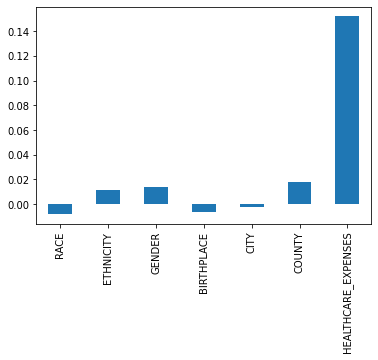

In [17]:
target = Y.astype(int)
fields = X

correlations = fields.corrwith(target)
correlations.plot(kind='bar')

In [18]:
predictors = X.columns[0:]

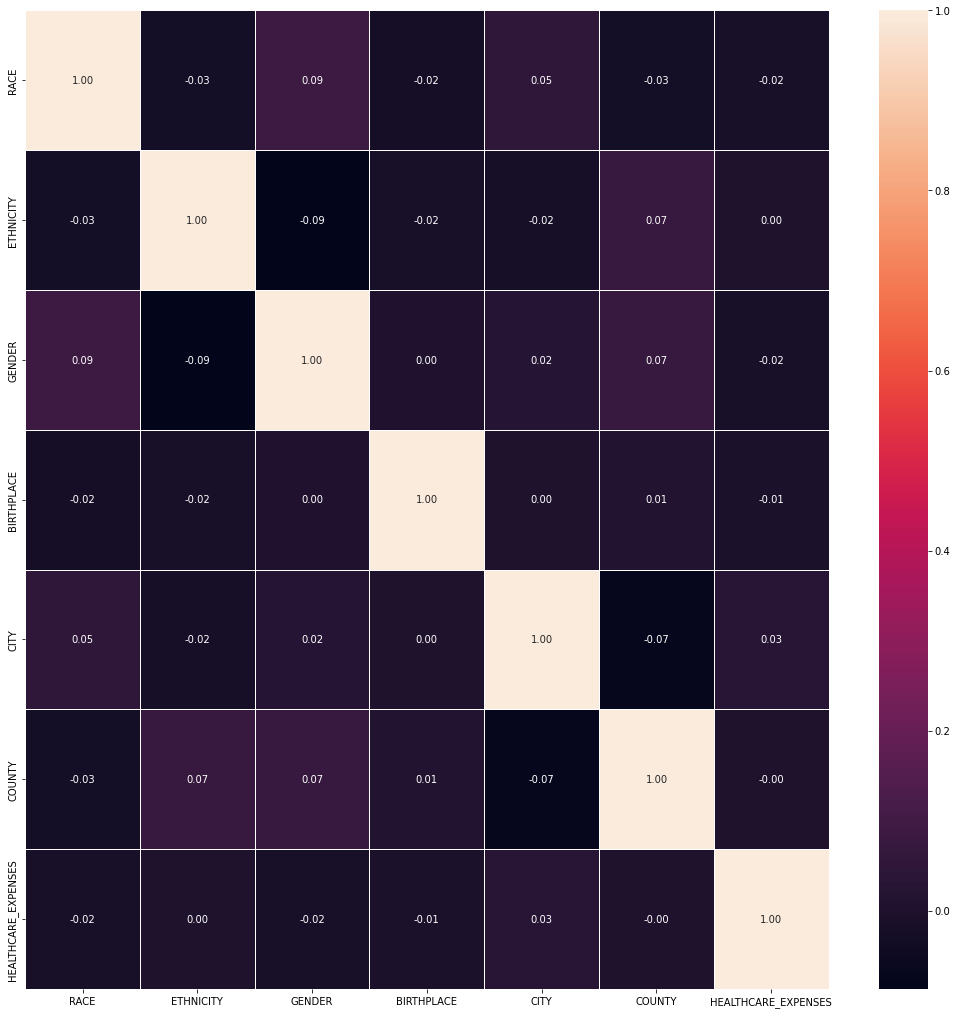

In [19]:
plt.figure(figsize=(18,18))
sns.heatmap(X[predictors].corr(),linewidths=1,annot=True,fmt='.2f')
plt.show()

array([[<AxesSubplot:title={'center':'HEALTHCARE_EXPENSES'}>]],
      dtype=object)

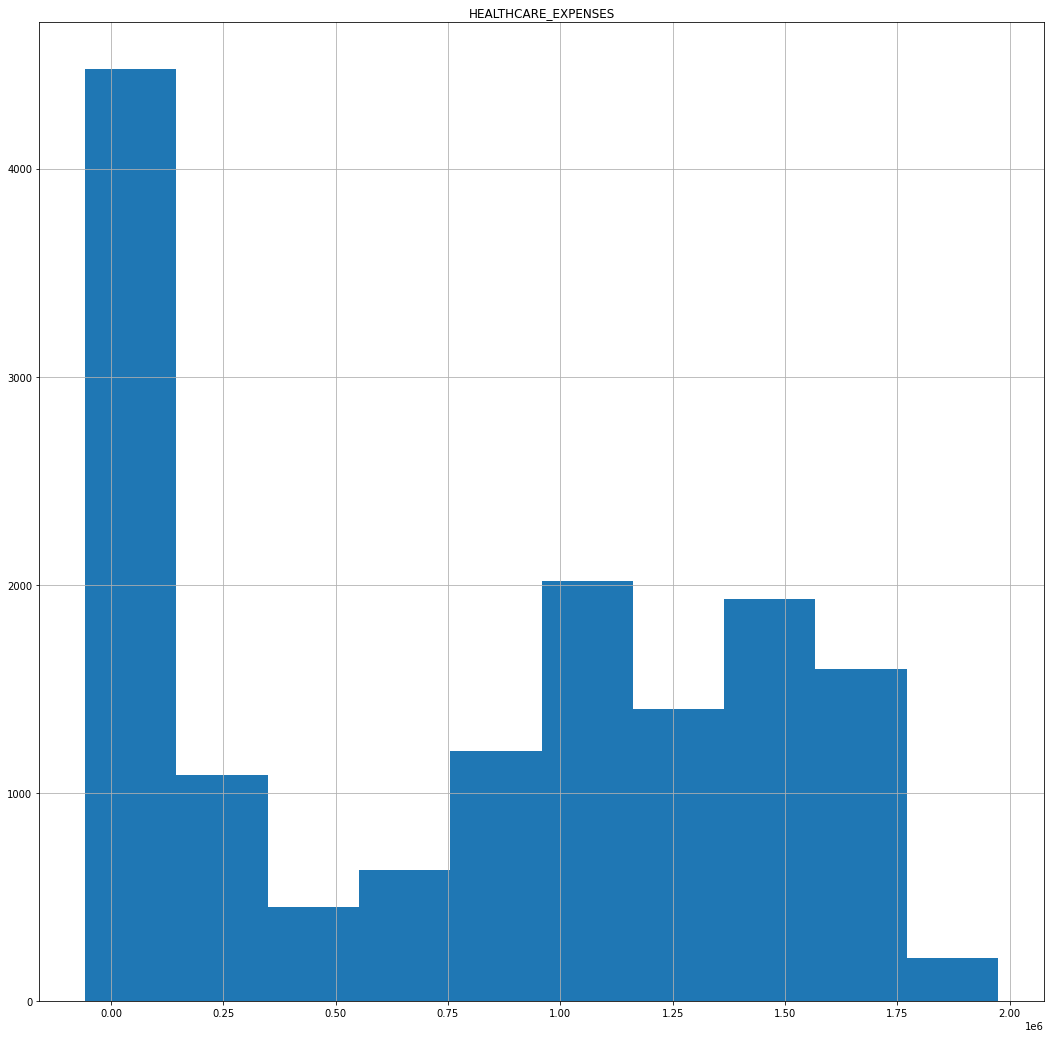

In [20]:
train_df[predictors].hist(figsize=(18,18))

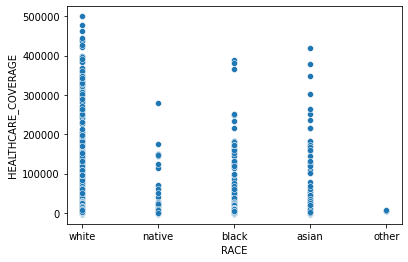

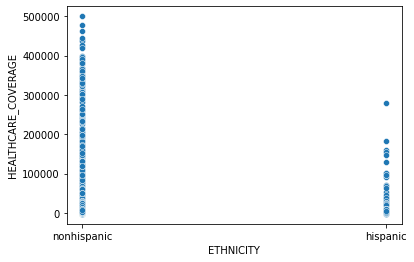

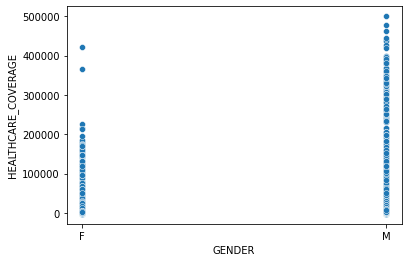

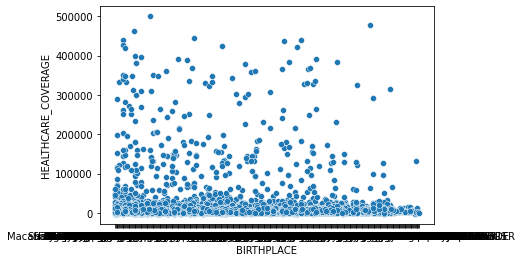

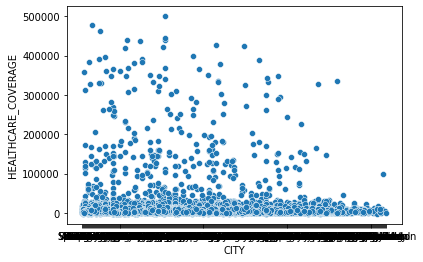

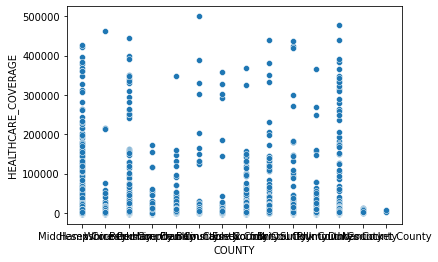

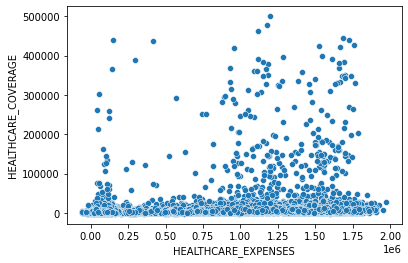

In [21]:
for col in predictors:
    sns.scatterplot(x=train_df[col],y=Y)
    plt.show()

## Logistic Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

## Test the data with our model

In [24]:
test_df = test[['RACE', 'ETHNICITY', 'GENDER','BIRTHPLACE', 'CITY', 'COUNTY', 'HEALTHCARE_EXPENSES']]

In [25]:
test_df.head()

,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,COUNTY,HEALTHCARE_EXPENSES
0,white,nonhispanic,M,East Bridgewater Massachusetts US,Cambridge,Middlesex County,977341.80200
1,white,nonhispanic,M,Lexington Massachusetts US,Kingston,Middlesex County,683440.03840
2,white,nonhispanic,F,Woburn Massachusetts US,Fall River,Middlesex County,758751.65560
3,white,nonhispanic,M,New Bedford Massachusetts US,Barnstable,Barnstable County,79532.07604
4,white,nonhispanic,F,Danvers Massachusetts US,Lawrence,Worcester County,93806.91339


In [26]:
test_df = test_df.apply(encoder.fit_transform)
test_df

,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,COUNTY,HEALTHCARE_EXPENSES
0,4,1,1,74,41,8,2155
1,4,1,1,143,110,8,1707
2,4,1,0,318,75,8,1776
3,4,1,1,185,16,0,568
4,4,1,0,62,114,13,735
...,...,...,...,...,...,...,...
3995,4,1,1,45,246,8,3056
3996,4,1,1,54,73,8,1326
3997,4,1,0,45,159,4,2591
3998,4,1,1,31,58,4,3093


In [27]:
test_df.shape

(4000, 7)

In [28]:
len(test_df)

4000

In [29]:
predicts = model.predict(test_df)
print(predicts)

[5092.79413983 4433.16124852 3317.03485554 ... 3915.80634335 5591.16094281
 5700.53166927]


In [30]:
output_ = pd.DataFrame({'ID': [i+1 for i in range(len(test_df))],'HEALTHCARE_COVERAGE': predicts})
print(output_)

        ID  HEALTHCARE_COVERAGE
0        1          5092.794140
1        2          4433.161249
2        3          3317.034856
3        4          2451.910668
4        5          3174.576210
...    ...                  ...
3995  3996          5695.115780
3996  3997          4243.406777
3997  3998          3915.806343
3998  3999          5591.160943
3999  4000          5700.531669

[4000 rows x 2 columns]


## Submission file

In [31]:
output_.to_csv('submission.csv', index=False)